# Integrantes

1. Idmir de la Cruz
2. Tulio Pinillos
3. Cecilia del Castillo
4. Daniel Godoy

# Librerias

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt


# Importar data

In [ ]:
# Configurando directorio de trabajo en drive

import os

os.chdir("/content/drive/MyDrive/Proyecto BI 2023")

In [ ]:
!ls

 apriori_dmc.ipynb
 clustering_distritos.ipynb
 output.xlsx
'proyecto BI - data - entregable v2.1.xlsx'
'proyecto BI - data - entregable v2.2.xlsx'
'proyecto BI - data - entregable.xlsx'
'proyecto BI.xlsx'
 Proyecto_retail_1.ipynb


In [ ]:
df = pd.read_excel( 'proyecto BI - data - entregable v2.2.xlsx' , sheet_name= 'BD x distrito' , skiprows=1 )

# Diccionario de variables

- Distrito:	Distritos donde operan los clientes
- soles:	venta en soles bianual 2022 y 2023
- peso:	venta en kilos bianual 2022 y 2023
- Nro clientes:	cantidad de clientes únicos del 2022 y 2023
- Nro trx:	cantidad de transacciones únicas en el 2022 y 2023
- Nro Clientes -mes:	cantidad de clientes x mes durante los 2 años
- venta anual x cliente:	venta en soles promedio bianual por cliente
- venta mensual x cliente:	venta en soles promedio mensual por cliente
- venta x transacción:	venta en soles promedio x transacción
- peso anual x cliente:	peso promedio bianual por cliente
- peso mensual x cliente:	peso promedio mensual por cliente
- peso x transacción:	peso promedio x transacción
- precio prom x ton:	precio promedio x tonelada
- mix_categorías prom mensual x cliente:	cantida de categorías únicas en promedio compradas por cliente

# Exploracion de los datos

In [ ]:
df.head(3)

,Distrito,soles,peso,Nro clientes,Nro trx,Nro Clientes -mes,venta anual x cliente,venta mensual x cliente,venta x transacción,peso anual x cliente,peso mensual x cliente,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente,Unnamed: 14
0,LIMA,3.416390e+06,592516.855,274.0,13674.0,4172.0,12468.576946,818.885447,249.845699,1049.022827,71.581872,28.116599,5.765895,4.738255,5.765895
1,SAN JUAN DE LURIGANC,2.360310e+06,464250.956,391.0,16472.0,7086.0,6036.597557,333.094785,143.292232,2162.470274,142.022257,43.331641,5.084124,3.715354,5.084124
2,LA VICTORIA,2.032418e+06,375214.360,151.0,7434.0,2266.0,13459.721261,896.918760,273.394930,705.620117,66.094908,28.667671,5.416685,4.804060,5.416685


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distrito                               44 non-null     object 
 1   soles                                  44 non-null     float64
 2   peso                                   44 non-null     float64
 3   Nro clientes                           44 non-null     float64
 4   Nro trx                                44 non-null     float64
 5   Nro Clientes -mes                      44 non-null     float64
 6   venta anual x cliente                  44 non-null     float64
 7   venta mensual x cliente                44 non-null     float64
 8   venta x transacción                    44 non-null     float64
 9   peso anual x cliente                   44 non-null     float64
 10  peso mensual x cliente                 44 non-null     float64
 11  peso x t

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
soles,44.0,536528.694109,675468.140632,7364.304000,119888.500800,394765.411200,667842.019200,3.416390e+06
peso,44.0,97742.114045,123646.005154,1336.771000,20562.389500,66028.653000,111509.081000,5.925169e+05
Nro clientes,44.0,71.522727,80.410137,1.000000,19.500000,50.000000,80.250000,3.910000e+02
Nro trx,44.0,2741.136364,3434.910944,42.000000,675.750000,1670.500000,3292.500000,1.647200e+04
Nro Clientes -mes,44.0,1057.772727,1313.461110,24.000000,270.750000,741.500000,1310.000000,7.086000e+03
venta anual x cliente,44.0,8516.183869,9354.287919,1472.860800,4602.996336,6356.214606,9402.533096,6.225780e+04
veta mensual x cliente,44.0,536.959765,401.186806,129.300884,316.843919,464.544155,599.900501,2.594075e+03
venta x transacción,44.0,220.335862,206.872546,64.324263,139.665834,188.850822,247.423768,1.482329e+03
peso anual x cliente,44.0,1429.663819,1235.179004,267.354200,778.443758,1196.123304,1714.642699,8.014678e+03
veta mensual x cliente.1,44.0,92.398801,54.178378,24.221408,60.639218,83.835827,106.147009,3.339449e+02


In [ ]:
# Limpieza de variables a criterio o porque algunas son el resultado de combinar variables

df_0 = df[['Distrito','Nro Clientes -mes', 'venta mensual x cliente', 'venta x transacción',
           'peso x transacción', 'precio prom x ton', 'mix_categorías prom mensual x cliente']].copy()

## Analizar correlacion entre variables

In [ ]:
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_nums = df_0.select_dtypes(include=numerics)

In [ ]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Nro Clientes -mes                      44 non-null     float64
 1   venta mensual x cliente                44 non-null     float64
 2   venta x transacción                    44 non-null     float64
 3   peso x transacción                     44 non-null     float64
 4   precio prom x ton                      44 non-null     float64
 5   mix_categorías prom mensual x cliente  44 non-null     float64
dtypes: float64(6)
memory usage: 2.2 KB


In [ ]:
df_nums.head(3)

,Nro Clientes -mes,venta mensual x cliente,venta x transacción,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente
0,4172.0,818.885447,249.845699,28.116599,5.765895,4.738255
1,7086.0,333.094785,143.292232,43.331641,5.084124,3.715354
2,2266.0,896.918760,273.394930,28.667671,5.416685,4.804060


<ipython-input-15-f469120927d8>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_nums.corr(), dtype=np.bool))


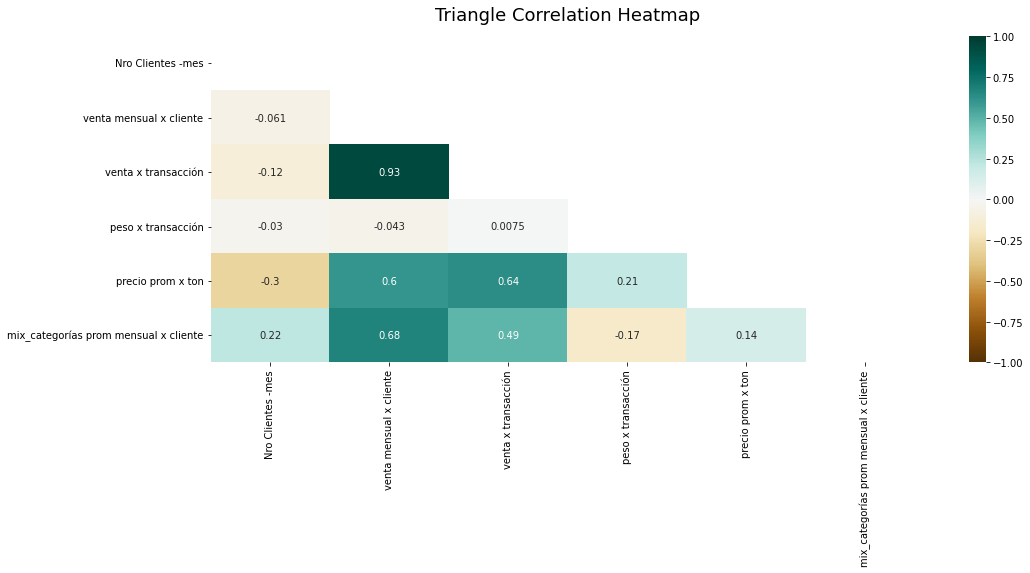

In [ ]:
# correlation heatmap

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_nums.corr(), dtype=np.bool))

heatmap = sns.heatmap(df_nums.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas


def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_nums, 10))

Top Absolute Correlations
venta mensual x cliente  venta x transacción                      0.931676
                         mix_categorías prom mensual x cliente    0.676319
venta x transacción      precio prom x ton                        0.635026
venta mensual x cliente  precio prom x ton                        0.604337
venta x transacción      mix_categorías prom mensual x cliente    0.488392
Nro Clientes -mes        precio prom x ton                        0.301188
                         mix_categorías prom mensual x cliente    0.223525
peso x transacción       precio prom x ton                        0.207092
                         mix_categorías prom mensual x cliente    0.170339
precio prom x ton        mix_categorías prom mensual x cliente    0.140655
dtype: float64


In [ ]:
columnas_eliminar = [ 'venta mensual x cliente' ]

df2 = df_nums.drop(columnas_eliminar , axis=1)

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df2, 10))

Top Absolute Correlations
venta x transacción  precio prom x ton                        0.635026
                     mix_categorías prom mensual x cliente    0.488392
Nro Clientes -mes    precio prom x ton                        0.301188
                     mix_categorías prom mensual x cliente    0.223525
peso x transacción   precio prom x ton                        0.207092
                     mix_categorías prom mensual x cliente    0.170339
precio prom x ton    mix_categorías prom mensual x cliente    0.140655
Nro Clientes -mes    venta x transacción                      0.115102
                     peso x transacción                       0.030317
venta x transacción  peso x transacción                       0.007471
dtype: float64


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Nro Clientes -mes                      44 non-null     float64
 1   venta x transacción                    44 non-null     float64
 2   peso x transacción                     44 non-null     float64
 3   precio prom x ton                      44 non-null     float64
 4   mix_categorías prom mensual x cliente  44 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


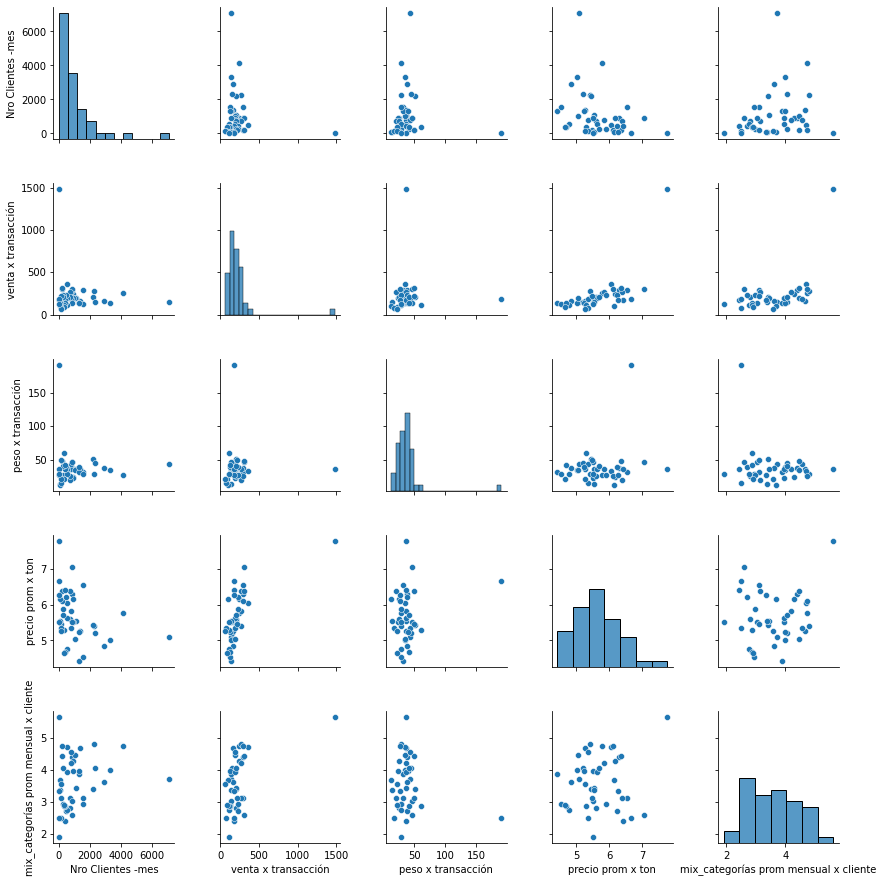

In [ ]:
# exploracion visual de distribucion y relacion entre variables

sns.pairplot(df2)
plt.show()

## Tratamiento de outliers

In [ ]:
# skewed data

def iqr_capping(df, columns):
  ''' 
  columns (list)
  '''
  df2 = df.copy() # hacemos que el df original no se sobreescriba

  for i in columns:
    percentile25 = df2[i].quantile(0.25)
    percentile75 = df2[i].quantile(0.75)

    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df2[i] = np.where( df2[i] > upper_limit, upper_limit,
              np.where( df2[i] < lower_limit, lower_limit,
                     df2[i])
            )
    
  return df2


# normal distribution data

def std_capping(df, columns):
  ''' 
  columns (list)
  '''
  df2 = df.copy() # hacemos que el df original no se sobreescriba

  for i in columns:

    upper_limit = df2[i].mean() + 3*df2[i].std()
    lower_limit = df2[i].mean() - 3*df2[i].std()

    df2[i] = np.where( df2[i] > upper_limit, upper_limit,
              np.where( df2[i] < lower_limit, lower_limit,
                     df2[i])
            )
    
  return df2

In [ ]:
# apply capping outliers

df3 = iqr_capping(df2 , ['Nro Clientes -mes', 'venta x transacción', 'peso x transacción'])

df3 = std_capping(df3 , ['precio prom x ton', 'mix_categorías prom mensual x cliente'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


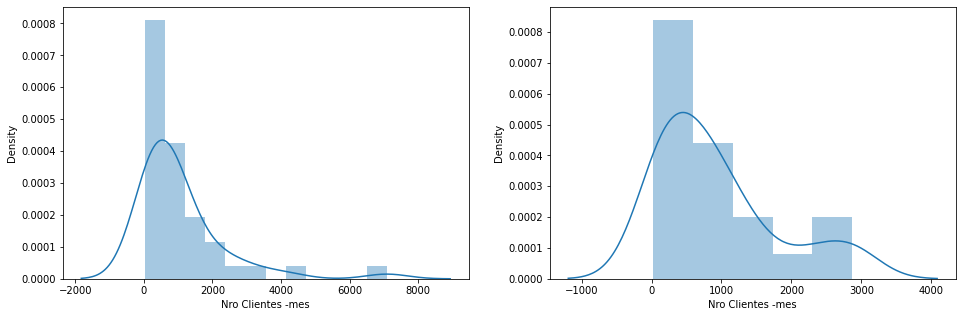

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df2['Nro Clientes -mes'])   # sns.displot(df2['venta anual x cliente'])
plt.subplot(1,2,2)
sns.distplot(df3['Nro Clientes -mes'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Nro Clientes -mes


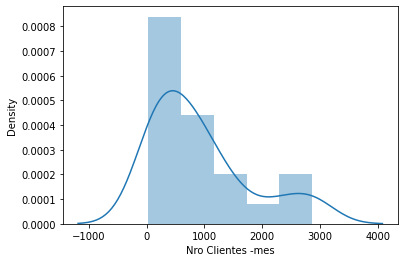

venta x transacción


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


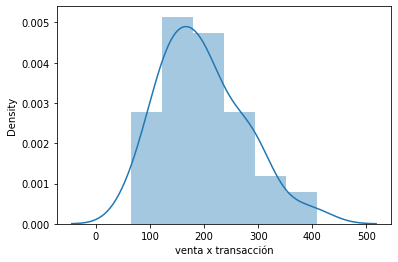

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


peso x transacción


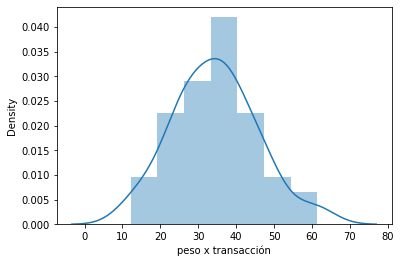

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


precio prom x ton


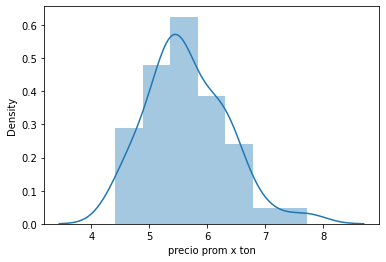

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mix_categorías prom mensual x cliente


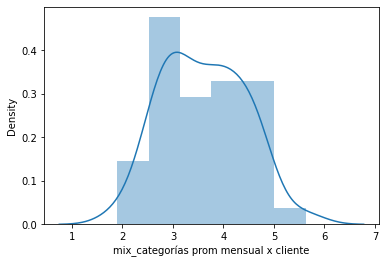

In [ ]:
for i in list(df3.columns):
  sns.distplot(df3[i])
  print(i)
  plt.show()


In [ ]:
# scale -> standardize para que todas las variables tengan misma varianza (asunciones de modelos como K MEANS)

from sklearn.preprocessing import StandardScaler

# standardization 
scaled_features = StandardScaler().fit_transform(df3.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df3.index, columns=df3.columns)

scaled_features_df.head(3)

,Nro Clientes -mes,venta x transacción,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente
0,2.283412,0.705220,-0.576058,0.165505,1.400197
1,2.283412,-0.688851,0.817153,-0.836580,0.134548
2,1.576444,1.013322,-0.525597,-0.347774,1.481618


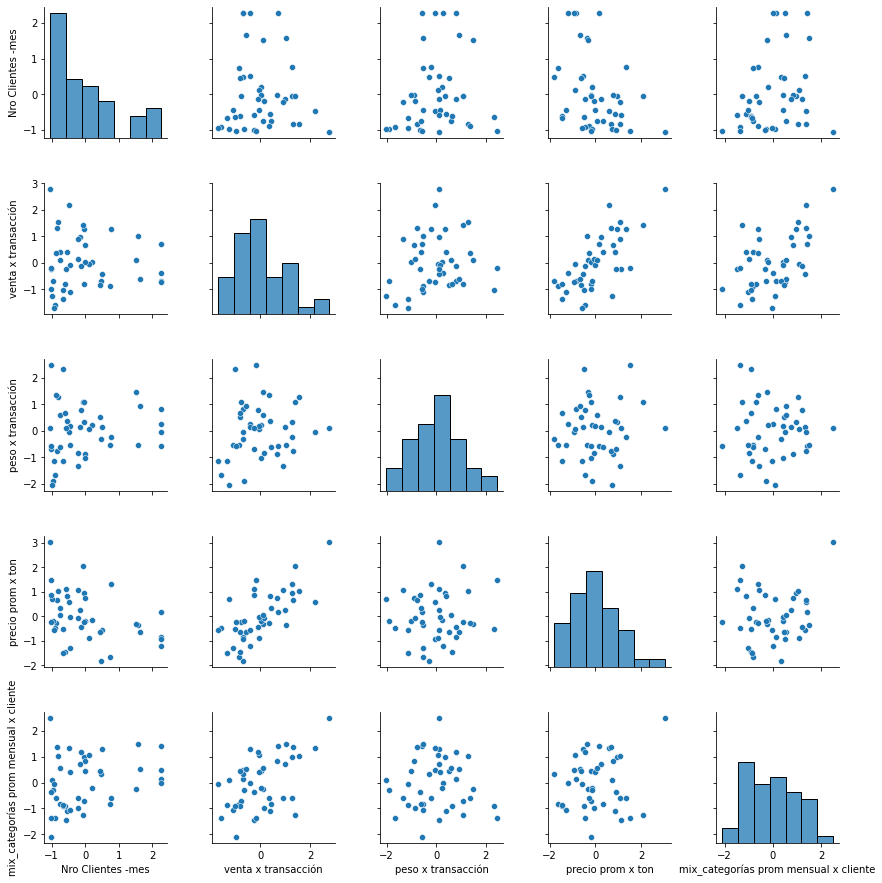

In [ ]:
sns.pairplot(scaled_features_df)

## Hierarchical clustering - Agglomerative Clustering 

Es un algoritmo de ML no supervisado, que de forma iterativa, agrupa los clusters más similares. Los principales parámetros a definir son los siguientes:

- n_clusters: número de clusters
- affinity: métrica para calcular la distancia entre las observaciones                                   
- linkage: el algoritmo agrupará los clusters con menor distancia siguiendo este criterio

Se planteó el uso de este modelo para el clustering ya que el costo computacional no sería alto al tener 44 observaciones ( cantidad de distritos a clusterizar)

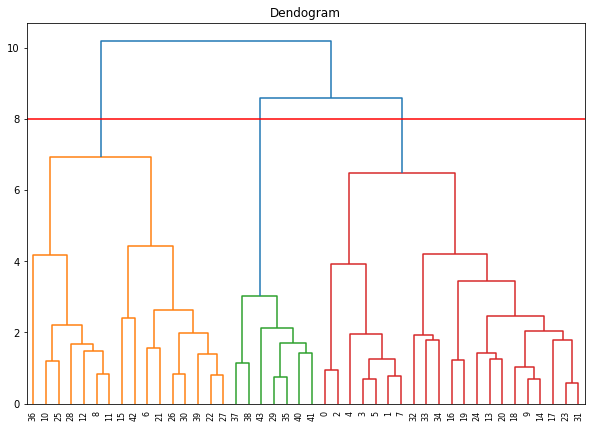

In [ ]:
# plotting dendogram

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

clusters = shc.linkage(scaled_features_df, 
            method='ward', 
            metric="euclidean")


plt.figure(figsize=(10, 7))
plt.title("Dendogram")

shc.dendrogram(clusters)
plt.axhline( y = 8,
            color = 'r', linestyle = '-')

In [ ]:
# Determinación de cantidad de clusters

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

def silhouette_score_graph(df, ini, end, x_axis, y_axis):

  for n_clusters in range(ini, end+1):
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)
  
      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(df) + (n_clusters) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      
      clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

      cluster_labels = clusterer.fit_predict(df)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(df, cluster_labels)

      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples( df, cluster_labels)

      y_lower = 10

      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i+1) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)

      ax2.scatter(df[x_axis], df[y_axis], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(("Silhouette analysis for clustering on  data "
                    "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

  plt.show()

For n_clusters = 3 The average silhouette_score is : 0.22614663215168856
For n_clusters = 4 The average silhouette_score is : 0.2415019907008274
For n_clusters = 5 The average silhouette_score is : 0.2589025527625713


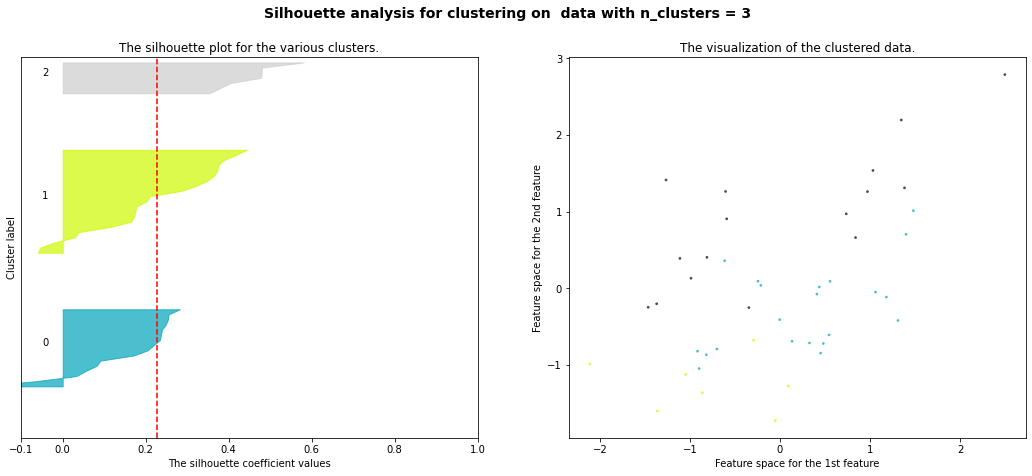

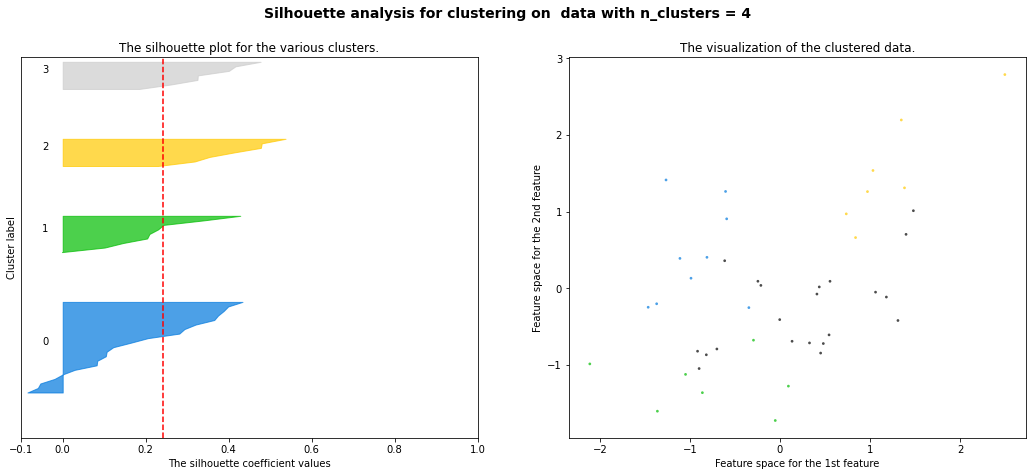

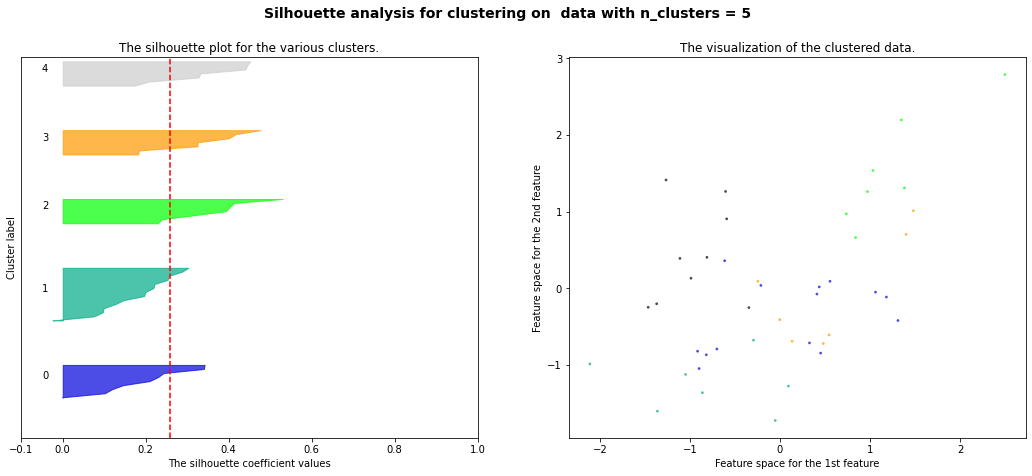

In [ ]:
# Gráficos para determinación de clusters

silhouette_score_graph(scaled_features_df, ini= 3, end= 5,
                       x_axis = 'mix_categorías prom mensual x cliente',
                       y_axis = 'venta x transacción')



Dado que la métrica de silhouette es muy similar entre las cantidades propuestas de clusters, por decisión de negocio se mantendrán 3 clusters.

In [ ]:
# Modelo con objetuvo de 3 clusters

from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 3,
                                           affinity='euclidean', 
                                           linkage='ward')

clustering_model.fit(scaled_features_df)


AgglomerativeClustering(n_clusters=3)

Text(0.5, 1.0, 'Labeled Data')

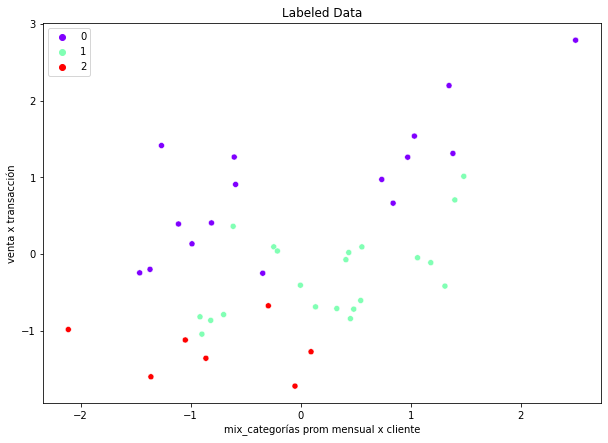

In [ ]:

data_labels = clustering_model.labels_

plt.figure(figsize=(10, 7))

sns.scatterplot(x = 'mix_categorías prom mensual x cliente', 
                y = 'venta x transacción', 
                data = scaled_features_df, 
                hue= data_labels,
                palette= 'rainbow').set_title('Labeled Data')

In [ ]:
# Pegar valores a dataframe luego de limpieza de outliers

df4 = df3.copy()

df4['clusters'] = data_labels

df4['Distrito'] = df_0['Distrito']


In [ ]:
df4.head(3)

,Nro Clientes -mes,venta x transacción,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente,clusters,Distrito
0,2868.875,249.845699,28.116599,5.765895,4.738255,1,LIMA
1,2868.875,143.292232,43.331641,5.084124,3.715354,1,SAN JUAN DE LURIGANC
2,2266.000,273.394930,28.667671,5.416685,4.804060,1,LA VICTORIA


In [ ]:
df4['clusters'].value_counts()

1    21
0    16
2     7
Name: clusters, dtype: int64

## Profiling

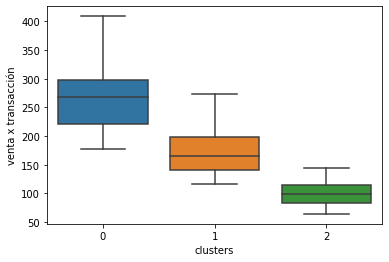

In [ ]:
# Box plot 

sns.boxplot(x='clusters', y='venta x transacción', data= df4)

Nro Clientes -mes


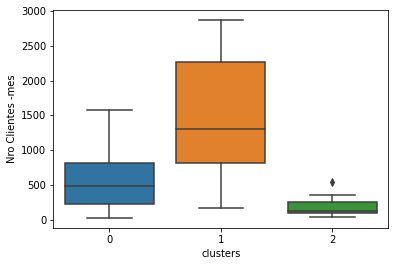

venta x transacción


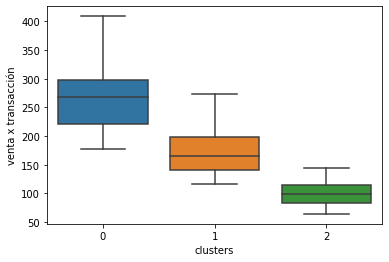

peso x transacción


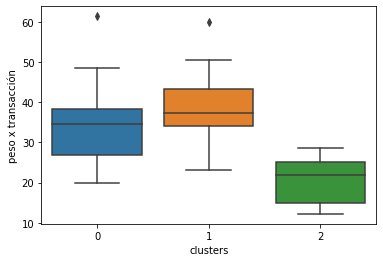

precio prom x ton


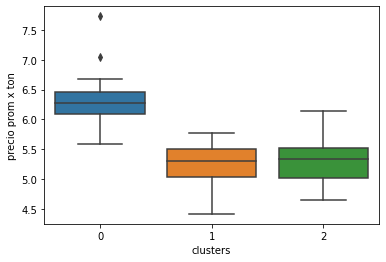

mix_categorías prom mensual x cliente


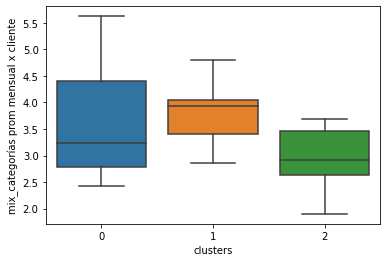

In [ ]:
variables = ['Nro Clientes -mes', 'venta x transacción', 'peso x transacción', 'precio prom x ton', 'mix_categorías prom mensual x cliente']

for i in variables:
  sns.boxplot(x='clusters', y= df4[i], data= df4)
  print(i)
  plt.show()

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://www.analyticsvidhya.com/blog/2021/10/how-to-build-a-treemap-in-3-ways-using-python/

import squarify

sns.set_style(style="whitegrid") # set seaborn plot style

df4['values'] = 1

sizes= df4["values"].values # proportions of the categories

label= df4["Distrito"]


In [ ]:
def colors_clusters(x):

  if x == 0:
    a = "Red"
  elif x == 1:
    a = "Blue"
  elif x == 2:
    a = "Yellow"
  else:
    a = "Green"

  return a


df4['colors'] = df4["clusters"].apply(lambda x: colors_clusters(x))

colors = df4['colors']

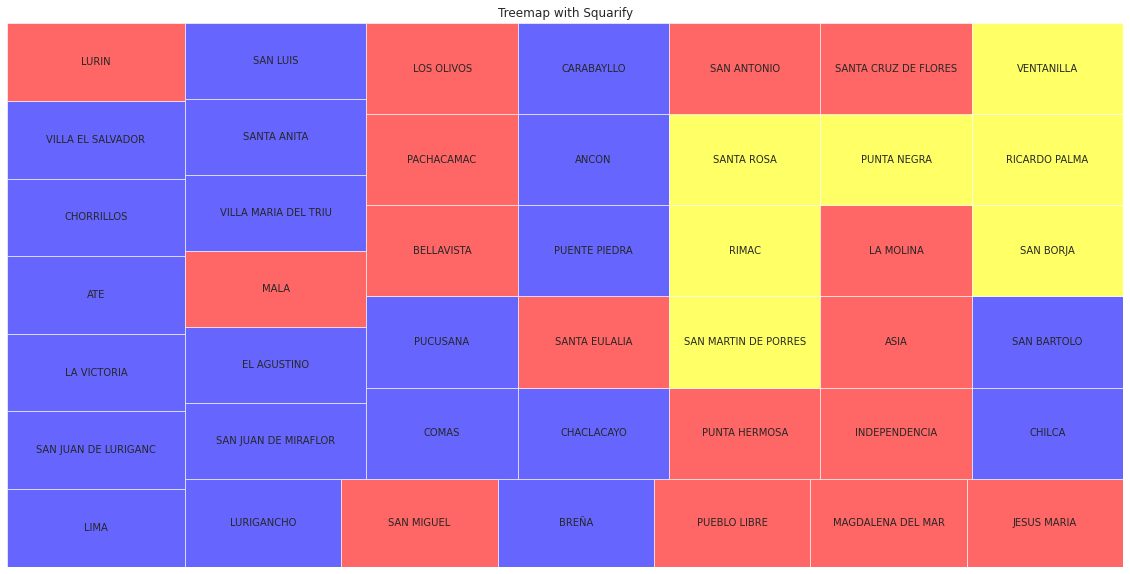

In [ ]:
plt.figure(figsize=(20, 10))

squarify.plot(sizes=sizes, label=label, alpha=0.6, color = colors ).set(title='Treemap with Squarify')

plt.axis('off')
plt.show()

In [ ]:
# Exportar resultados

df4.to_excel("clusters_distritos.xlsx")  

## Gaussian clustering model (GMM)

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
#from mat4py import loadmat
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

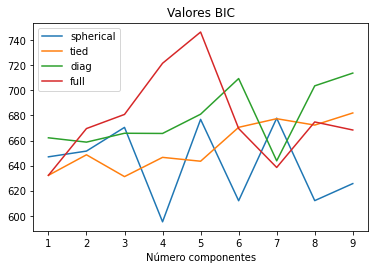

In [ ]:
# Tunning del modelo GMM
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

n_components = range(1, 10)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo = modelo.fit(scaled_features_df)
        valores_bic.append(modelo.bic(scaled_features_df))
        
    ax.plot(n_components, valores_bic, label=covariance_type)
        
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [ ]:
modelo_gmm_1 = GaussianMixture(
                n_components    = 4,
                covariance_type = 'spherical',
                random_state    = 123
             )

modelo_gmm_1.fit(X= scaled_features_df)

GaussianMixture(covariance_type='spherical', n_components=4, random_state=123)

Text(0.5, 1.0, 'Labeled Data')

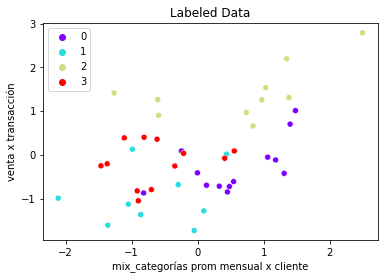

In [ ]:
# https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

# predictions from gmm
gmm_labels_1 = modelo_gmm_1.predict(scaled_features_df)

sns.scatterplot(x = 'mix_categorías prom mensual x cliente', 
                y = 'venta x transacción', 
                data = scaled_features_df, 
                hue= gmm_labels_1,
                palette= 'rainbow').set_title('Labeled Data')

Text(0.5, 1.0, 'Labeled Data')

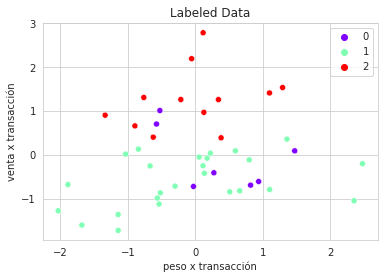

In [ ]:
modelo_gmm_2 = GaussianMixture(
                n_components    = 3,
                covariance_type = 'tied',
                random_state    = 123
             )

modelo_gmm_2.fit(X= scaled_features_df)

# predictions from gmm
gmm_labels_2 = modelo_gmm_2.predict(scaled_features_df)

sns.scatterplot(x = 'peso x transacción', 
                y = 'venta x transacción', 
                data = scaled_features_df, 
                hue= gmm_labels_2,
                palette= 'rainbow').set_title('Labeled Data')



# MARKET BASKET ANALYSIS

In [ ]:
# LEER BASE DE TRX - AÑOS 2021 Y 2022

data = pd.read_excel('proyecto BI - data - entregable.xlsx' , sheet_name= 'base_trx_proyecto_BI' )

## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437074 entries, 0 to 437073
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   periodo            437074 non-null  float64       
 1   fecha_facturacion  437074 non-null  datetime64[ns]
 2   cod_encriptado     437074 non-null  float64       
 3   DISTRITO           437074 non-null  object        
 4   category           437074 non-null  object        
 5   sku                437074 non-null  object        
 6   ID_SKU             437074 non-null  float64       
 7   venta_soles_vf     437074 non-null  float64       
 8   centa_ton_vf       437074 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 30.0+ MB


In [ ]:
data.head(3)

,periodo,fecha_facturacion,cod_encriptado,DISTRITO,category,sku,ID_SKU,venta_soles_vf,centa_ton_vf
0,202101.0,2021-01-01,111111.0,SAN ANTONIO,ACEITE A GRANEL,ACEIT. CIL FS CC 20LT 1BLD,1.0,91.2192,18.31
1,202101.0,2021-01-01,111111.0,SAN ANTONIO,CEREALES FS,FRIJOL NICOLINI 1KG 6BOL,2.0,23.3280,3.00
2,202101.0,2021-01-01,111111.0,SAN ANTONIO,LAVAVAJILLAS INTRADEVCO,LAVAV. PROF.SAPOLIO AB LIMON 1KG.6FCO,3.0,23.0208,6.00


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
periodo,437074.0,202162.187938,49.732751,202101.0000,202108.0000,202202.0000,202207.0000,202212.0000
cod_encriptado,437074.0,112079.826382,699.574559,111111.0000,111507.0000,111953.0000,112555.0000,114258.0000
ID_SKU,437074.0,37.384626,27.661385,1.0000,15.0000,31.0000,52.0000,100.0000
venta_soles_vf,437074.0,59.471698,186.711762,-6353.1456,8.4768,22.8576,49.6608,34914.3552
centa_ton_vf,437074.0,11.058085,26.540604,0.0000,2.0000,5.0000,12.0000,3662.0000


In [ ]:
data.describe(include= 'object')

,DISTRITO,category,sku
count,437074,437074,437074
unique,44,22,100
top,LIMA,PASTAS,LAVAV. PROF.SAPOLIO AB LIMON 1KG.6FCO
freq,58251,83550,30830


In [ ]:
data.category.value_counts()

PASTAS                           83550
ACEITE A GRANEL                  78553
SALSAS GASTRONOMÍA               67304
AYUDAS CULINARIAS                46695
LAVAVAJILLAS INTRADEVCO          30830
LEJÍAS                           27079
DETERGENTES INTRADEVCO           26235
GALLETAS                         14774
LIMPIADORES LIGHT DUTY           13845
MARGARINAS INDUSTRIALES           9468
HARINAS INDUSTRIALES              7109
LIMPIADORES ESPECIALIZADOS        6996
CUIDADO DE LA PIEL INTRADEVCO     6062
CEREALES FS                       5803
DESCARTABLES SSCC                 5687
KIKKO                             2109
CONGELADOS                        1810
EXPORTADORA ROMEX                 1074
HARINAS DOMÉSTICAS                 696
MANTECAS INDUSTRIALES              587
AVINKA                             536
PANETONES                          272
Name: category, dtype: int64

## 1

In [ ]:
# creamos la key

data['InvoiceNo'] = data['cod_encriptado'].map(str) + '-' +data['fecha_facturacion'].map(str)

data.head(3)

,periodo,fecha_facturacion,cod_encriptado,DISTRITO,category,sku,ID_SKU,venta_soles_vf,centa_ton_vf,InvoiceNo
0,202101.0,2021-01-01,111111.0,SAN ANTONIO,ACEITE A GRANEL,ACEIT. CIL FS CC 20LT 1BLD,1.0,91.2192,18.31,111111.0-2021-01-01 00:00:00
1,202101.0,2021-01-01,111111.0,SAN ANTONIO,CEREALES FS,FRIJOL NICOLINI 1KG 6BOL,2.0,23.3280,3.00,111111.0-2021-01-01 00:00:00
2,202101.0,2021-01-01,111111.0,SAN ANTONIO,LAVAVAJILLAS INTRADEVCO,LAVAV. PROF.SAPOLIO AB LIMON 1KG.6FCO,3.0,23.0208,6.00,111111.0-2021-01-01 00:00:00


In [ ]:
# Combinamos resultados del clustering

data_clusters = pd.merge(data, df4[['clusters','Distrito']], how='left', left_on='DISTRITO', right_on='Distrito')

data_clusters.head(2)

,periodo,fecha_facturacion,cod_encriptado,DISTRITO,category,sku,ID_SKU,venta_soles_vf,centa_ton_vf,InvoiceNo,clusters,Distrito
0,202101.0,2021-01-01,111111.0,SAN ANTONIO,ACEITE A GRANEL,ACEIT. CIL FS CC 20LT 1BLD,1.0,91.2192,18.31,111111.0-2021-01-01 00:00:00,0,SAN ANTONIO
1,202101.0,2021-01-01,111111.0,SAN ANTONIO,CEREALES FS,FRIJOL NICOLINI 1KG 6BOL,2.0,23.3280,3.00,111111.0-2021-01-01 00:00:00,0,SAN ANTONIO


In [ ]:

data_clusters.drop(columns= ['Distrito'], axis= 1, inplace = True)

In [ ]:
# se separan las TRX por cluster

df_clust_0 = data_clusters[data_clusters['clusters']== 0 ]

df_clust_1 = data_clusters[data_clusters['clusters']== 1 ]

df_clust_2 = data_clusters[data_clusters['clusters']== 2 ]

In [ ]:
df_clust_2.clusters.value_counts()

2    8610
Name: clusters, dtype: int64

## apriori

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
# data por sku

data_sku = data.groupby(['sku','ID_SKU'])['periodo'].count().reset_index(name='counts')

data_sku.head()

,sku,ID_SKU,counts
0,ACEIT. CIL FS 20LT 1BLD,87.0,113
1,ACEIT. CIL FS CC 20LT 1BLD,1.0,3668
2,ACEIT. CIL FS SMI 5LT 4BDN,34.0,1498
3,ACEIT. COCINERO FS 20L 1BLD,4.0,3168
4,ACEIT. COCINERO FS 5L 4BDN SMI,35.0,2657


In [ ]:
def encode_units(x):
  if x <= 0:
    a = 0
  else:
    a = 1
  
  return a


def join_l(x):

  str1 = [str(i) for i in x]
  a = "/".join(str1)
  return a


def market_basket(df, data_sku):

  basket = (df.groupby(['InvoiceNo', 'sku' ])['venta_soles_vf']
               .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
        
  basket_encode = basket.applymap(encode_units)

  # nos quedamos con las compras con 2 o mas items

  basket_filter = basket_encode[(basket_encode > 0).sum(axis=1) >= 2]

  basket_filter = basket_filter.replace(np.nan,0)

  # Compute frequent itemsets using the Apriori algorithm
  frequent_itemsets_plus = apriori(basket_filter, 
                                   min_support= 0.01, 
                                   max_len = 5, 
                                  use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

  frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

  # association_rules

  rules = association_rules(frequent_itemsets_plus, 
                            metric='lift', 
                            min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)


  rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

  rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

  #
  s1 = pd.merge(rules, data_sku, how='left', left_on='antecedents', right_on='sku')

  s1['ant_ID_SKU'] = s1['ID_SKU']

  s1.drop(['sku', 'counts','ID_SKU'], axis=1, inplace= True)

  #
  s2 = pd.merge(s1, data_sku, how='left', left_on='consequents', right_on='sku')

  s2['con_ID_SKU'] = s2['ID_SKU']

  s2.drop(['sku', 'counts','ID_SKU'], axis=1, inplace= True)

  # KEY OF RULES

  add = s2[['ant_ID_SKU', 'con_ID_SKU']]

  add['key'] = add.values.tolist()

  add['key_2'] = add.key.sort_values().apply(lambda x: sorted(x))

  add = add[['key_2']]

  #
  s4 = pd.concat([ s2, add ], axis=1)

  r1 = lambda x: join_l(x)
  s4['key_3'] = s4['key_2'].apply(r1)

  #
  s4["rank"] = s4.groupby("key_3")["confidence"].rank(method="dense", ascending=False)

  #
  s5 = s4[ s4['rank'] == 1]

  return s5


In [ ]:
rules_clust_0 = market_basket(df_clust_0, data_sku) 

rules_clust_1 = market_basket(df_clust_1, data_sku) 

rules_clust_2 = market_basket(df_clust_2, data_sku) 

<ipython-input-60-9777a951a179>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add['key'] = add.values.tolist()
<ipython-input-60-9777a951a179>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add['key_2'] = add.key.sort_values().apply(lambda x: sorted(x))


In [ ]:
# cantidad de reglas

print(f'cantidad de reglas en cluster 0 {rules_clust_0.shape[0]}', '\n')

print(f'cantidad de reglas en cluster 1 {rules_clust_1.shape[0]}' , '\n')

print(f'cantidad de reglas en cluster 2 {rules_clust_2.shape[0]}' , '\n')

cantidad de reglas en cluster 0 187 

cantidad de reglas en cluster 1 140 

cantidad de reglas en cluster 2 111 



In [ ]:
rules_clust_0.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_ID_SKU,con_ID_SKU,key_2,key_3,rank
0,ENV DEL 1LT D2 SUP. FAST 1CJA4BOL50UND,TAP DELI 1LT D2 SUPER FAST 1CJA4BOL50UND,0.012536,0.014919,0.011912,0.950226,63.694063,0.011725,19.791181,5.0,6.0,"[5.0, 6.0]",5.0/6.0,1.0
3,PASTA. NICOLINI CAN.CHIC. 250GR 20BOL,PASTA. NICOLINI TORNILL. 250GR 20BOL,0.023371,0.025640,0.010891,0.466019,18.175788,0.010292,1.824711,22.0,27.0,"[22.0, 27.0]",22.0/27.0,1.0
4,PASTA. NICOLINI TORNILL. 250GR 20BOL,PASTA. NICOLINI COD.RAY 250GR 20BOL,0.025640,0.029043,0.010778,0.420354,14.473477,0.010033,1.675086,27.0,24.0,"[24.0, 27.0]",24.0/27.0,1.0
7,NU.FID.DON VITTORIO COD.RAY.250G 20BOL,NU.FID.DON VITTORIO RIGATONI 250GR 20BOL,0.025186,0.038686,0.011629,0.461712,11.934774,0.010654,1.785872,51.0,54.0,"[51.0, 54.0]",51.0/54.0,1.0
8,PASTA. NICOLINI COD.RAY 250GR 20BOL,PASTA. NICOLINI RIGATONI 250GR 20BOL,0.029043,0.056668,0.017868,0.615234,10.856824,0.016222,2.451706,24.0,25.0,"[24.0, 25.0]",24.0/25.0,1.0


In [ ]:
# exportar reglas

rules_clust_0.to_excel("rules_cluster_0.xlsx")  

rules_clust_1.to_excel("rules_cluster_1.xlsx")  

rules_clust_2.to_excel("rules_cluster_2.xlsx")  